In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sb

In [39]:
# Función para graficar una matriz de correlaciones en un mapa de calor
def plot_heatmap(Corr_mtx):
    sb.set_theme(rc={'figure.figsize':(10,8)})
    sb.heatmap(Corr_mtx, cmap="YlGnBu", annot=False) 

In [2]:
columns = pd.read_csv('/home/chay/LLCP2023ASC/variable_layout2023.dat',sep='\t')

# Calculate the File_Width column
columns['File_Width'] = [
    columns.loc[y + 1, 'StartingColumn'] - columns.loc[y, 'StartingColumn'] 
    if y < len(columns) - 1 else 1
    for y in range(len(columns))
]

# Filter rows where File_Width > 0
columns = columns[columns['File_Width'] > 0]

responses = pd.read_fwf(
    "/home/chay/LLCP2023ASC/LLCP2023.ASC", 
    widths=columns['File_Width'].tolist(), 
    names=columns['VariableName'].tolist()
)

In [3]:
# Visualizamos los primeros datos de todo el dataset
responses.head()

,_STATE,FMONTH,IMONTH,IDAY,IYEAR,DISPCODE,_PSU,CTELENM1,PVTRESD1,COLGHOUS,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,1,1,3,1,2023,1100,2023000001,1.0,1.0,NaN,...,0,1,0,1,2.0,2.0,2.0,1,1,9
1,1,1,1,6,2023,1100,2023000002,1.0,1.0,NaN,...,0,1,0,1,1.0,1.0,2.0,1,1,9
2,1,1,3,8,2023,1100,2023000003,1.0,1.0,NaN,...,0,1,0,1,1.0,1.0,2.0,1,1,9
3,1,1,3,6,2023,1100,2023000004,1.0,1.0,NaN,...,0,1,0,1,1.0,1.0,1.0,1,1,9
4,1,1,1,6,2023,1100,2023000005,1.0,1.0,NaN,...,7,1,47,1,2.0,1.0,2.0,1,1,2


## Tomamos los datos la section Calculated Variables
Estas son variables imputadas y aparentemente no aparecen datos faltantes

In [4]:
# Aislamos las variables correspondientes a Calculated variables
calculated_variables = responses.columns[272:]
Dataset = responses[calculated_variables]

## Hacemos la exploración de los datos con Dataset

### Dimensiones

In [5]:
# Dimensiones del dataset
print('Hay %d datos y %d variables'%(len(Dataset),len(Dataset.columns)))

Hay 433323 datos y 76 variables


### ¿Qué tan bien informadas están las variables?

<Axes: >

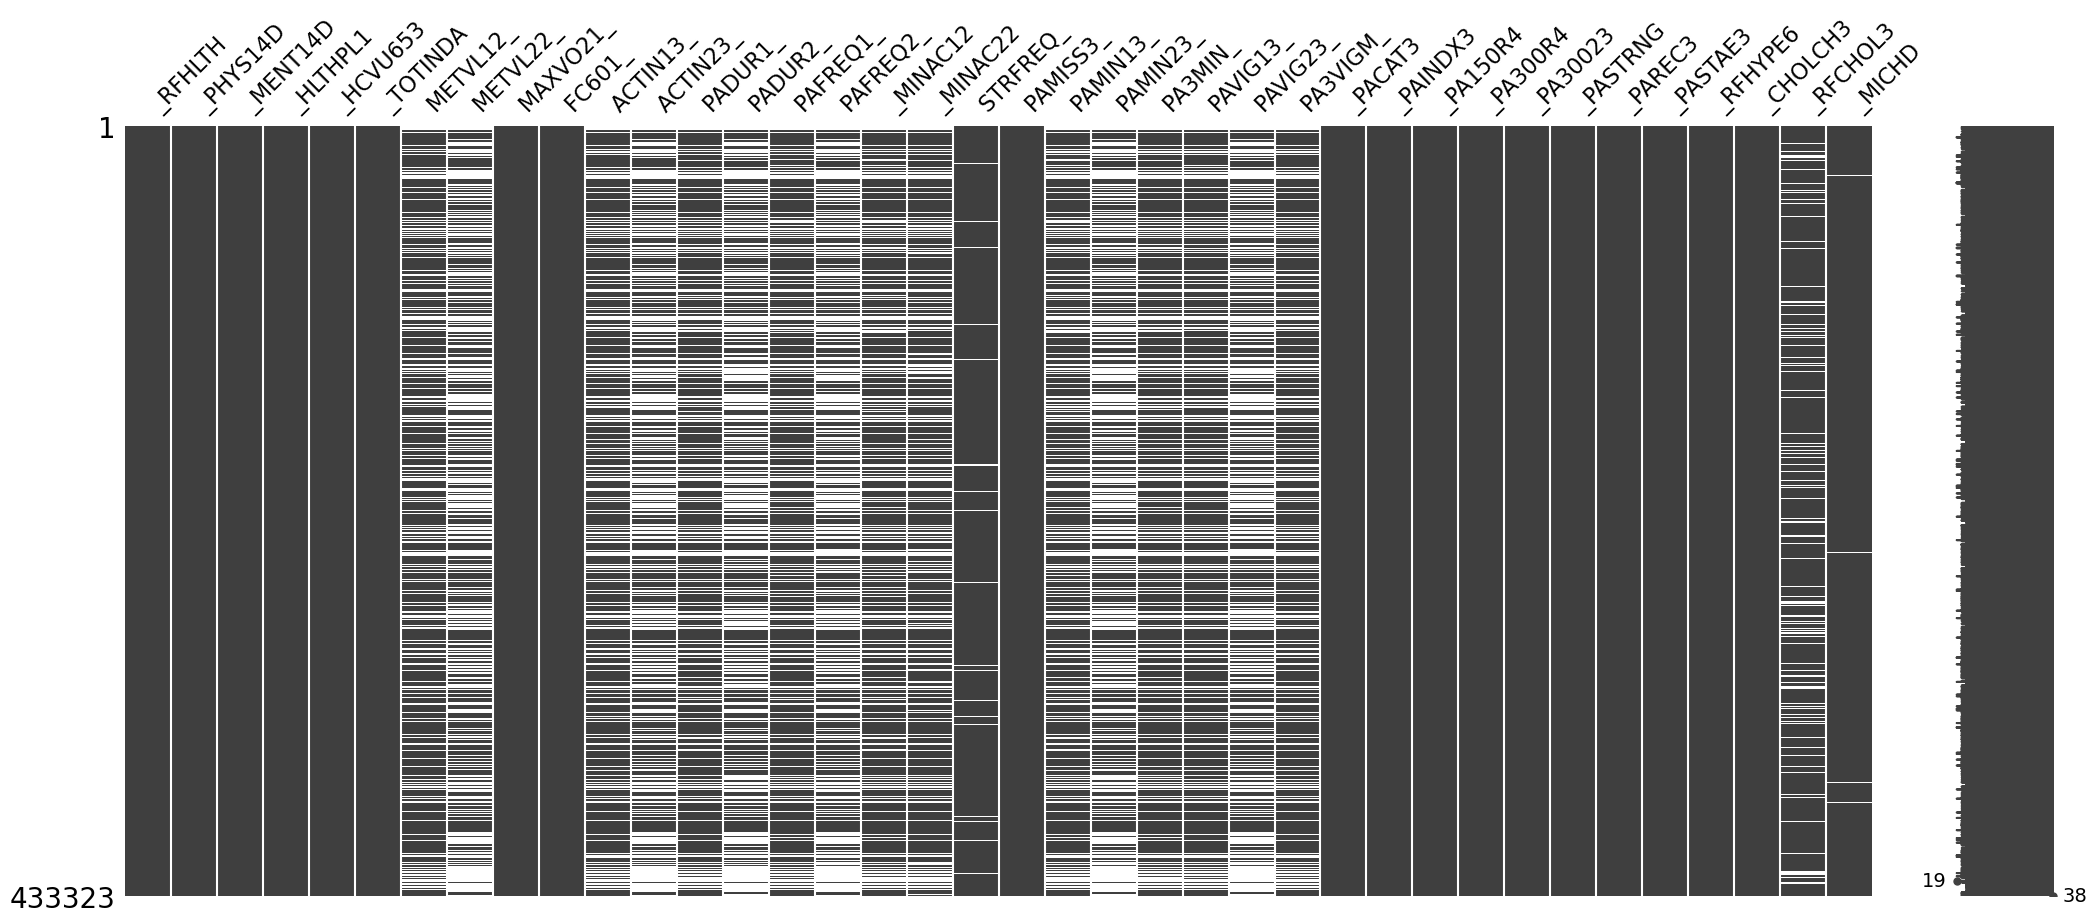

In [7]:
msno.matrix(Dataset.iloc[:,0:38])

In [ ]:
# Figura de Cantidad de datos en cada variable por Instrumento
fig = px.histogram(counts_per_f, x='Field', y='Count',color='Instrument',title='Cantidad de datos por Instrumento',
                   hover_data =counts_per_f.columns,text_auto=True,pattern_shape='Type') #,

percentiles = [0.25*3960, 0.50*3960, 0.75*3960,3960]



for p in range(4):
    fig.add_hline(y=percentiles[p], line_dash="dash", line_color="red",
                  annotation_text=f"{int((p+1)*25)}%", annotation_position="top right")
    

fig.show()

<Axes: >

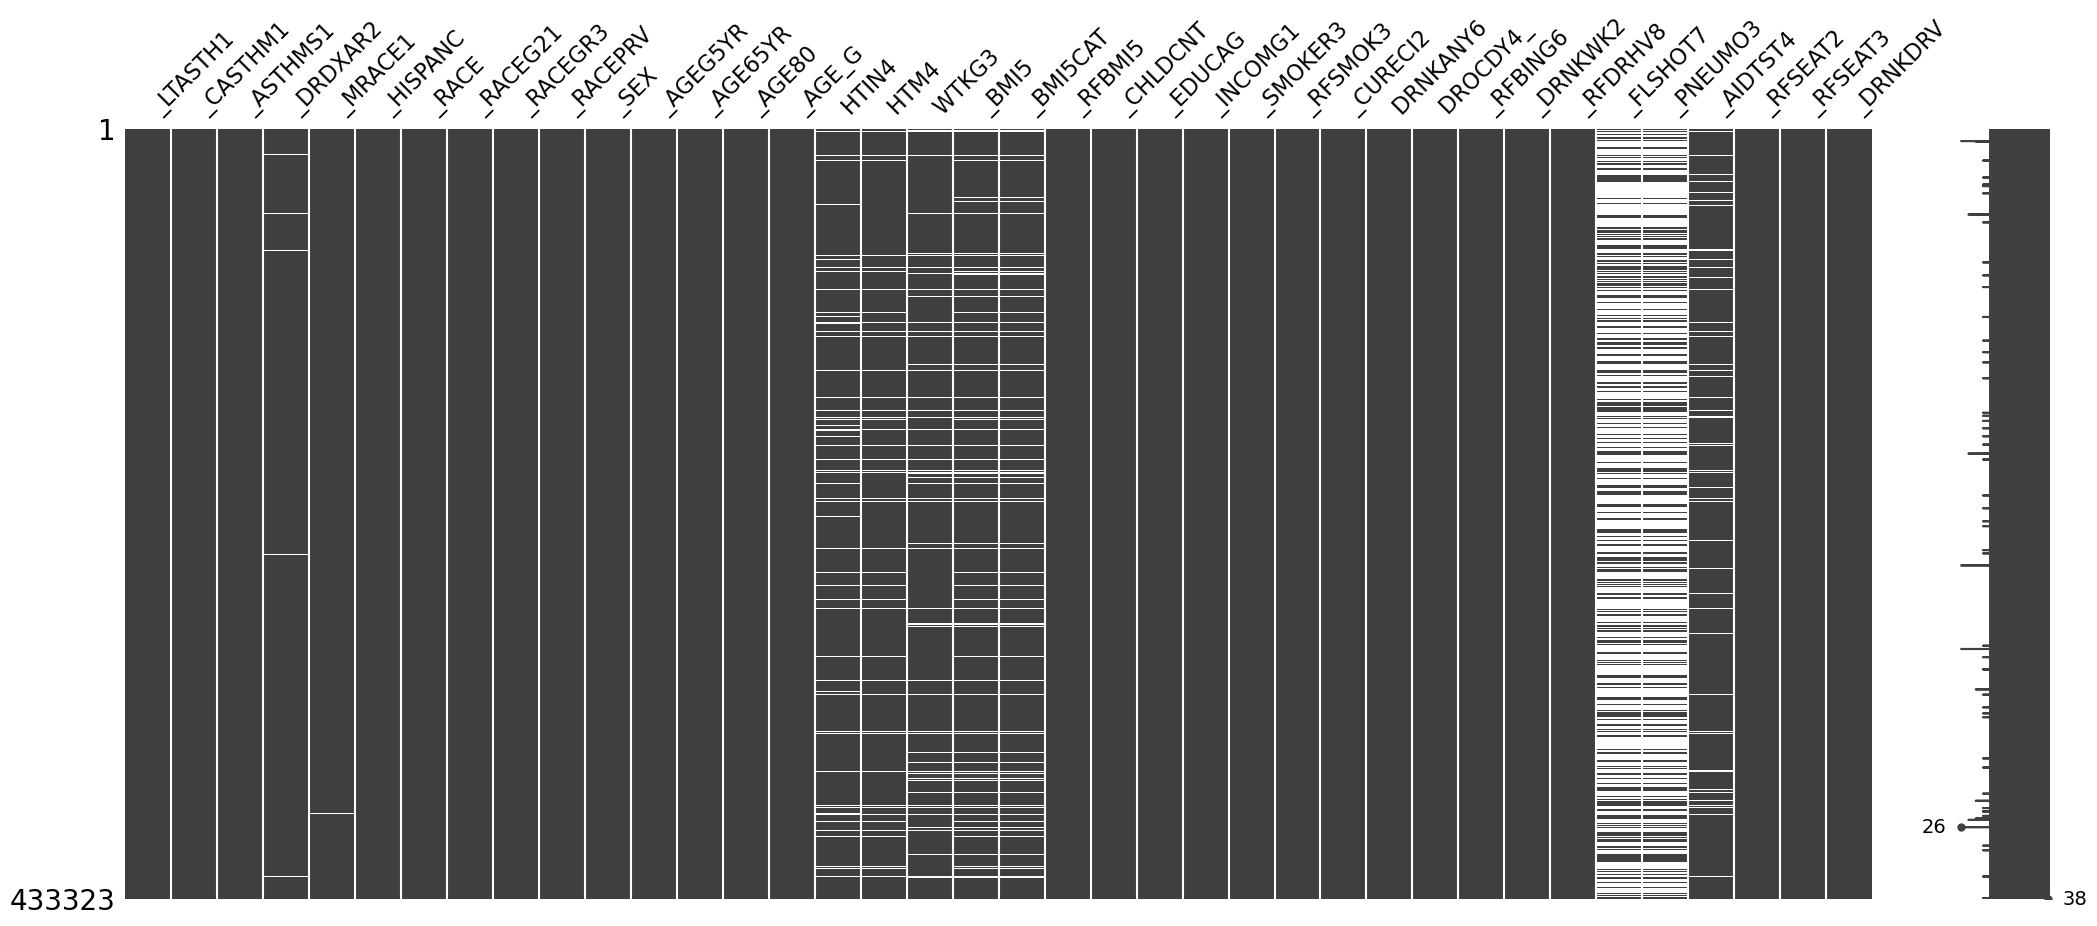

In [8]:
msno.matrix(Dataset.iloc[:,38:])

### ¿Qué porcentaje de datos tienen las variables?

In [26]:
DataCounts = 100*Dataset.count()/len(Dataset)
DataCounts = pd.DataFrame(DataCounts.reset_index())
DataCounts = DataCounts.rename(columns= {'index':'name',0:'count'})

In [27]:
DataCounts

,name,count
0,_RFHLTH,100.000000
1,_PHYS14D,100.000000
2,_MENT14D,100.000000
3,_HLTHPL1,100.000000
4,_HCVU653,100.000000
...,...,...
71,_PNEUMO3,39.421632
72,_AIDTST4,93.166068
73,_RFSEAT2,100.000000
74,_RFSEAT3,100.000000


In [30]:
# Figura de Cantidad de datos en cada variable por Instrumento
fig = px.histogram(DataCounts, x='name', y='count',title='Cantidad de datos por Variable',
                   hover_data =DataCounts.columns,text_auto=True)

percentiles = [25, 50, 75,100]


for p in range(4):
    fig.add_hline(y=percentiles[p], line_dash="dash", line_color="red",
                  annotation_text=f"{int((p+1)*25)}%", annotation_position="top right")
    

fig.show()

#### Posibles variables de respuesta:
- _MICHD: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

In [ ]:
# Variables que podrían no aportar nada
NotUseful = {'_HLTHPL1 ':'Adults who had some form of health insurance',
             '_HCVU653 ':'Respondents aged 18-64 who have any form of health insurance',
             '_CHLDCNT ':'Number of children in household',
             '_EDUCAG ':'Level of education completed',
             '_INCOMG1 ':'Income categories',
             '_RFSEAT2 ':'Always or Nearly Always Wear Seat Belts Calculated Variable',
             '_RFSEAT3 ':'Always Wear Seat Belts Calculated Variable',
             '_DRNKDRV ':'Drinking and Driving  (Reported having driven at least once when perhaps had too much to drink)'
             }

# Variables relacionadas a alguna actividad física
PhysicalRelated = {'_TOTINDA ':'Adults who reported doing physical activity or exercise during the past 30 days other than their regular job',
                   'METVL12_ ':'Activity MET Value for First Activity',
                   'METVL22_ ':'Activity MET Value for Second Activity',
                   'MAXVO21_ ':'Estimated Age-Gender Specific Maximum Oxygen Consumption',
                   'ACTIN13_ ':'Estimated Activity Intensity for First Activity',
                   'ACTIN23_ ':'Estimated Activity Intensity for Second Activity',
                   'PADUR1_ ':'Minutes of First Activity',
                   'PADUR2_ ':'Minutes of Second Activity',
                   'PAFREQ1_ ':'Physical Activity Frequency per Week for First Activity',
                   'PAFREQ2_ ':'Physical Activity Frequency per Week for Second Activity',
                   '_MINAC12 ':'Minutes of Physical Activity per week for First Activity',
                   '_MINAC22 ':'Minutes of Physical Activity per week for Second Activity',
                   'STRFREQ_ ':'Strength Activity Frequency per Week',
                   'PAMISS3_ ':'Missing Physical Activity Data',
                   'PAMIN13_ ':'Minutes of Physical Activity per week for First Activity',
                   'PAMIN23_ ':'Minutes of Physical Activity per week for Second Activity',
                   'PA3MIN_ ':'Minutes of total Physical Activity per week',
                   'PAVIG13_ ':'Minutes of Vigorous Physical Activity per week for First Activity',
                   'PAVIG23_ ':'Minutes of Vigorous Physical Activity per week for Second Activity',
                   'PA3VIGM_ ':'Minutes of total Vigorous Physical Activity per week',
                   '_PA150R4 ':'Adults that participated in 150 minutes (or vigorous equivalent minutes) of physical activity per week.',
                   '_PA300R4 ':'Adults that participated in greater than 300 minutes  (or vigorous equivalent minutes) of physical activity per week.',
                   '_PA30023 ':'Adults that participated in greater than 300 minutes  (or vigorous equivalent minutes) of physical activity per week (2-levels).',
                   '_PASTAE3 ':'Aerobic and Strengthening (2-level)',
                   '_PAREC3 ':'Aerobic and Strengthening Guideline'
                   }

# Variables relacionadas a la raza o etnia de la persona
RaceRelated = {'_MRACE1 ':'Calculated multiracial race categorization',
              '_HISPANC ':'Hispanic, Latino/a, or Spanish origin calculated variable',
              '_RACEG21 ':'White non-Hispanic race group',
              '_RACEGR3 ':'Five-level race/ethnicity category',
              '_RACEPRV ':'Computed race groups used for internet prevalence tables'
              }

# Relacionadas a la edad.
AgeRelated = {'_AGE65YR ':'Two-level age category',
              '_AGE80 ':'Imputed Age value collapsed above 80',
              '_AGE_G ':'Six-level imputed age category'
              }

# Relacionada a las características físicas de la persona
BodyRelated = {'HTIN4 ':'Reported height in inches',
               '_BMI5 ':'Body Mass Index (BMI)',
               '_BMI5CAT ':'Four-categories of Body Mass Index (BMI)'
               }

# Relacionada al consumo de cigarro y alcohol
SmokeRelated = {'_RFSMOK3 ':'Adults who are current smokers',
                'DRNKANY6 ':'Adults who reported having had at least one drink of alcohol in the past 30 days.',
                'DROCDY4_ ':'Drink-occasions-per-day',
                '_RFBING6 ':'Binge drinkers (males having five or more drinks on one occasion, females having four or more drinks on one occasion)',
                '_RFDRHV8 ':'Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)'
                }

# Variables que resumen o dan la misma información que anteriores y algunas extras
UsefulVars = {'FC601_ ':'Estimated Functional Capacity',
              '_RFHLTH ':'Adults with good or better health',
              '_PHYS14D ':'3 level not good physical health status: 0 days, 1-13 days, 14-30 days',
              '_MENT14D ':'3 level not good mental health status: 0 days, 1-13 days, 14-30 days',
              '_PACAT3 ':'Physical Activity Categories',
              '_PAINDX3 ':'Physical Activity Index',
              '_PASTRNG ':'Muscle Strengthening Recommendation',
              '_RACE ':'Race/ethnicity categories',
              '_RFHYPE6 ':'Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional',
              '_CHOLCH3 ':'Cholesterol check within past five years',
              '_RFCHOL3 ':'Adults who have had their cholesterol checked and have been told by a doctor, nurse, or other health professional that it was high',
              '_LTASTH1 ':'Adults who have ever been told they have asthma',
              '_CASTHM1 ':'Adults who have been told they currently have asthma',
              '_ASTHMS1 ':'Computed asthma status',
              '_DRDXAR2 ':'Respondents who have had a doctor diagnose them as having some form of arthritis',
              '_SEX ':'Calculated sex variable',
              '_AGEG5YR ':'Fourteen-level age category',
              'HTM4 ':'Reported height in meters',
              'WTKG3 ':'Reported weight in kilograms',
              '_RFBMI5 ':' Adults who have a body mass index greater than 25.00 (Overweight or Obese)',
              '_SMOKER3 ':' Four-level smoker status:  Everyday smoker, Someday smoker, Former smoker, Non-smoker',
              '_CURECI2 ':'Adults who are current e-cigarette users',
              '_DRNKWK2 ':'Calculated total number of alcoholic beverages consumed per week',
              '_FLSHOT7 ':'Adults aged 65+ who have had a flu shot within the past year',
              '_PNEUMO3 ':'Adults aged 65+ who have ever had a pneumonia vaccination',
              '_AIDTST4 ':'Adults who have ever been tested for HIV'
              }

# Variable de respuesta.
Response = {'_MICHD ':'Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)'}



In [6]:
# Con esto verificamos que los diccionarios estén completos y no falte ninguna de las 75 varibles clasificadas
Columns = Dataset.columns
Columns = Columns.drop(list(NotUseful.keys()))
Columns = Columns.drop(list(PhysicalRelated.keys()))
Columns = Columns.drop(list(RaceRelated.keys()))
Columns = Columns.drop(list(AgeRelated.keys()))
Columns = Columns.drop(list(BodyRelated.keys()))
Columns = Columns.drop(list(SmokeRelated.keys()))
Columns = Columns.drop(list(UsefulVars.keys()))
Columns = Columns.drop(list(Response.keys()))
print(len(Columns))
print(Columns)

0
Index([], dtype='object')


#### Remover variables que sean repetitivas o no útiles
Son aquellas variables que consideramos apriori no causan problemas en el corazón o que repiten la información de otras variables

In [ ]:
# Removemos todas las llaves de Dataset que se encuentran en NotUseful como llaves
DatasetClean1 = Dataset.drop(columns=list(NotUseful.keys()))

#### Analizar correlaciones

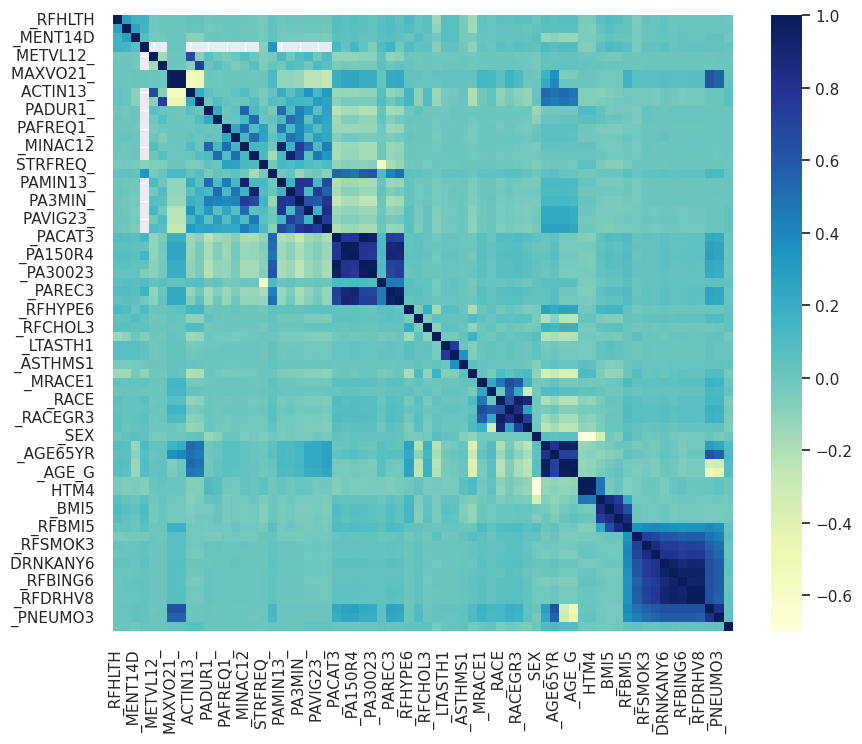

In [42]:
plot_heatmap(DatasetClean1.corr())

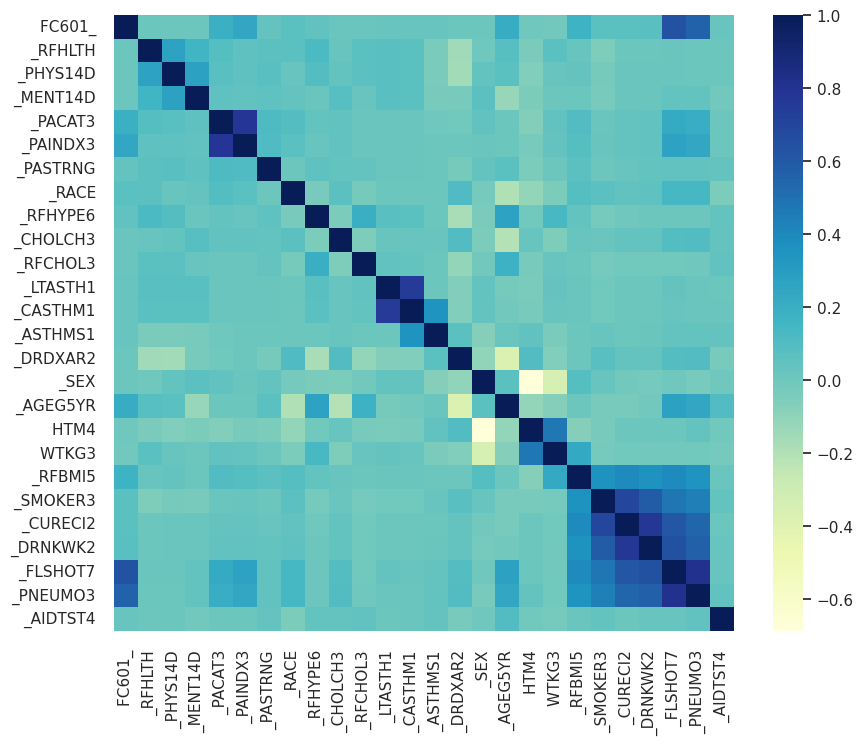

In [80]:
plot_heatmap(Dataset[list(UsefulVars.keys())].corr())

In [28]:
# Conservamos todas las variables en UsefulVars y Response.
DatasetClean = Dataset.drop(columns=list(NotUseful.keys()))
DatasetClean = DatasetClean.drop(columns=list(RaceRelated.keys()))
DatasetClean = DatasetClean.drop(columns=list(PhysicalRelated.keys()))
DatasetClean = DatasetClean.drop(columns=list(AgeRelated.keys()))
DatasetClean = DatasetClean.drop(columns=list(BodyRelated.keys()))
DatasetClean = DatasetClean.drop(columns=list(SmokeRelated.keys()))
DatasetClean
# Verficamso qué porcentaj de los datos se encuentra informado
DataCounts = 100*DatasetClean.count()/len(DatasetClean)
DataCounts = pd.DataFrame(DataCounts.reset_index())
DataCounts = DataCounts.rename(columns= {'index':'name',0:'count'})

In [29]:
len(DataCounts)

27

In [22]:
# Figura de Cantidad de datos en cada variable por Instrumento
fig = px.histogram(DataCounts, x='name', y='count',title='Cantidad de datos por Variable',
                   hover_data =DataCounts.columns,text_auto=True)

percentiles = [25, 50, 75,100]


for p in range(4):
    fig.add_hline(y=percentiles[p], line_dash="dash", line_color="red",
                  annotation_text=f"{int((p+1)*25)}%", annotation_position="top right")
    

fig.show()

## Por ahora me quedaré con todas las varibles que tengan más del 75%
Si no lo tienen más tarde podríamos verificar qué sucede si las imputamos con alguna librería.

In [30]:
DataCounts[DataCounts['count']<75]

,name,count
24,_FLSHOT7,39.421632
25,_PNEUMO3,39.421632


In [31]:
DatasetClean.columns

Index(['_RFHLTH ', '_PHYS14D ', '_MENT14D ', 'FC601_ ', '_PACAT3 ',
       '_PAINDX3 ', '_PASTRNG ', '_RFHYPE6 ', '_CHOLCH3 ', '_RFCHOL3 ',
       '_MICHD ', '_LTASTH1 ', '_CASTHM1 ', '_ASTHMS1 ', '_DRDXAR2 ', '_RACE ',
       '_SEX ', '_AGEG5YR ', 'HTM4 ', 'WTKG3 ', '_RFBMI5 ', '_SMOKER3 ',
       '_CURECI2 ', '_DRNKWK2 ', '_FLSHOT7 ', '_PNEUMO3 ', '_AIDTST4 '],
      dtype='object')

In [32]:
# Tomar las variables y dropearlas de DatasetClean

DatasetClean = DatasetClean.drop(columns=['_FLSHOT7 ', '_PNEUMO3 '])
DatasetClean.to_csv('/home/chay/LLCP2023ASC/DataCleaned.csv',index=False)